In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import boston_housing
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
# データ作成&正規化

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

def make_normalized_data(data, axis=0):
    mean_data = data.mean(axis)
    std_data = data.std(axis)
    normalized_data = (data - mean_data) / std_data
    return normalized_data

train_data = make_normalized_data(X_train)
train_label = make_normalized_data(y_train)
pre_test_data = make_normalized_data(X_train)
pre_test_label = make_normalized_data(y_train)
test_data, val_data, test_label, val_label = train_test_split(pre_test_data, pre_test_label, test_size=0.2)

print("正規化&データ分割")
print("train_data.shape", train_data.shape)
print("train_label.shape", train_label.shape)
print("test_data.shape", test_data.shape)
print("test_label.shape", test_label.shape)
print("val_data.shape", val_data.shape)
print("val_label.shape", val_label.shape)

# データ作成&正規化
正規化前
X_train.shape (404, 13)
y_train.shape (404,)
X_test.shape (102, 13)
y_test.shape (102,)

正規化&データ分割後
train_data.shape (404, 13)
train_label.shape (404,)
test_data.shape (323, 13)
test_label.shape (323,)
val_data.shape (81, 13)
val_label.shape (81,)


In [3]:
# Model

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# モデル定義


In [4]:
# Model Fitting

epochs = 500
batch_size = 30
early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1)

history = model.fit(
    train_data, train_label,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(test_data, test_label),
    callbacks=[early_stopping]
)

# モデル fitting
Train on 404 samples, validate on 323 samples
Epoch 1/500
404/404 [==============================] - 0s 599us/step - loss: 0.9080 - mae: 0.6770 - val_loss: 0.6690 - val_mae: 0.5216
Epoch 2/500
404/404 [==============================] - 0s 121us/step - loss: 0.4969 - mae: 0.4471 - val_loss: 0.4359 - val_mae: 0.4369
Epoch 3/500
404/404 [==============================] - 0s 207us/step - loss: 0.3358 - mae: 0.3882 - val_loss: 0.3180 - val_mae: 0.3753
Epoch 4/500
404/404 [==============================] - 0s 189us/step - loss: 0.2563 - mae: 0.3397 - val_loss: 0.2524 - val_mae: 0.3314
Epoch 5/500
404/404 [==============================] - 0s 121us/step - loss: 0.2088 - mae: 0.3049 - val_loss: 0.2087 - val_mae: 0.3027
Epoch 6/500
404/404 [==============================] - 0s 132us/step - loss: 0.1771 - mae: 0.2777 - val_loss: 0.1800 - val_mae: 0.2784
Epoch 7/500
404/404 [==============================] - 0s 127us/step - loss: 0.1546 - mae: 0.2633 - val_loss: 0.1566 - val_mae: 0.

Epoch 61/500
404/404 [==============================] - 0s 80us/step - loss: 0.0368 - mae: 0.1367 - val_loss: 0.0360 - val_mae: 0.1357
Epoch 62/500
404/404 [==============================] - 0s 88us/step - loss: 0.0370 - mae: 0.1360 - val_loss: 0.0382 - val_mae: 0.1429
Epoch 63/500
404/404 [==============================] - 0s 85us/step - loss: 0.0355 - mae: 0.1348 - val_loss: 0.0348 - val_mae: 0.1343
Epoch 64/500
404/404 [==============================] - 0s 109us/step - loss: 0.0355 - mae: 0.1320 - val_loss: 0.0348 - val_mae: 0.1334
Epoch 65/500
404/404 [==============================] - 0s 102us/step - loss: 0.0347 - mae: 0.1322 - val_loss: 0.0341 - val_mae: 0.1314
Epoch 66/500
404/404 [==============================] - 0s 80us/step - loss: 0.0331 - mae: 0.1285 - val_loss: 0.0330 - val_mae: 0.1273
Epoch 67/500
404/404 [==============================] - 0s 98us/step - loss: 0.0341 - mae: 0.1279 - val_loss: 0.0334 - val_mae: 0.1299
Epoch 68/500
404/404 [==============================]

404/404 [==============================] - 0s 88us/step - loss: 0.0191 - mae: 0.0987 - val_loss: 0.0203 - val_mae: 0.1049
Epoch 122/500
404/404 [==============================] - 0s 91us/step - loss: 0.0205 - mae: 0.0998 - val_loss: 0.0186 - val_mae: 0.1005
Epoch 123/500
404/404 [==============================] - 0s 108us/step - loss: 0.0189 - mae: 0.0995 - val_loss: 0.0176 - val_mae: 0.0976
Epoch 124/500
404/404 [==============================] - 0s 93us/step - loss: 0.0178 - mae: 0.0930 - val_loss: 0.0168 - val_mae: 0.0942
Epoch 125/500
404/404 [==============================] - 0s 122us/step - loss: 0.0175 - mae: 0.0921 - val_loss: 0.0167 - val_mae: 0.0947
Epoch 126/500
404/404 [==============================] - 0s 89us/step - loss: 0.0184 - mae: 0.1014 - val_loss: 0.0186 - val_mae: 0.1002
Epoch 127/500
404/404 [==============================] - 0s 144us/step - loss: 0.0191 - mae: 0.0989 - val_loss: 0.0158 - val_mae: 0.0902
Epoch 128/500
404/404 [==============================] - 0s

Epoch 181/500
404/404 [==============================] - 0s 98us/step - loss: 0.0140 - mae: 0.0842 - val_loss: 0.0109 - val_mae: 0.0760
Epoch 182/500
404/404 [==============================] - 0s 100us/step - loss: 0.0115 - mae: 0.0754 - val_loss: 0.0107 - val_mae: 0.0731
Epoch 183/500
404/404 [==============================] - 0s 94us/step - loss: 0.0126 - mae: 0.0801 - val_loss: 0.0136 - val_mae: 0.0838
Epoch 184/500
404/404 [==============================] - 0s 94us/step - loss: 0.0125 - mae: 0.0798 - val_loss: 0.0117 - val_mae: 0.0769
Epoch 185/500
404/404 [==============================] - 0s 90us/step - loss: 0.0130 - mae: 0.0820 - val_loss: 0.0105 - val_mae: 0.0747
Epoch 186/500
404/404 [==============================] - 0s 111us/step - loss: 0.0120 - mae: 0.0791 - val_loss: 0.0143 - val_mae: 0.0871
Epoch 187/500
404/404 [==============================] - 0s 114us/step - loss: 0.0124 - mae: 0.0785 - val_loss: 0.0113 - val_mae: 0.0769
Epoch 188/500
404/404 [======================

Epoch 241/500
404/404 [==============================] - 0s 128us/step - loss: 0.0078 - mae: 0.0617 - val_loss: 0.0072 - val_mae: 0.0593
Epoch 242/500
404/404 [==============================] - 0s 108us/step - loss: 0.0069 - mae: 0.0583 - val_loss: 0.0071 - val_mae: 0.0588
Epoch 243/500
404/404 [==============================] - 0s 82us/step - loss: 0.0077 - mae: 0.0603 - val_loss: 0.0083 - val_mae: 0.0671
Epoch 244/500
404/404 [==============================] - 0s 92us/step - loss: 0.0080 - mae: 0.0592 - val_loss: 0.0069 - val_mae: 0.0566
Epoch 245/500
404/404 [==============================] - 0s 94us/step - loss: 0.0069 - mae: 0.0576 - val_loss: 0.0063 - val_mae: 0.0542
Epoch 246/500
404/404 [==============================] - 0s 145us/step - loss: 0.0069 - mae: 0.0558 - val_loss: 0.0061 - val_mae: 0.0523
Epoch 247/500
404/404 [==============================] - 0s 144us/step - loss: 0.0090 - mae: 0.0668 - val_loss: 0.0090 - val_mae: 0.0672
Epoch 248/500
404/404 [=====================

Epoch 301/500
404/404 [==============================] - 0s 94us/step - loss: 0.0050 - mae: 0.0461 - val_loss: 0.0043 - val_mae: 0.0426
Epoch 302/500
404/404 [==============================] - 0s 90us/step - loss: 0.0047 - mae: 0.0440 - val_loss: 0.0043 - val_mae: 0.0427
Epoch 303/500
404/404 [==============================] - 0s 118us/step - loss: 0.0055 - mae: 0.0473 - val_loss: 0.0043 - val_mae: 0.0423
Epoch 304/500
404/404 [==============================] - 0s 120us/step - loss: 0.0057 - mae: 0.0507 - val_loss: 0.0044 - val_mae: 0.0443
Epoch 305/500
404/404 [==============================] - 0s 106us/step - loss: 0.0062 - mae: 0.0511 - val_loss: 0.0078 - val_mae: 0.0630
Epoch 306/500
404/404 [==============================] - 0s 89us/step - loss: 0.0061 - mae: 0.0543 - val_loss: 0.0052 - val_mae: 0.0490
Epoch 307/500
404/404 [==============================] - 0s 116us/step - loss: 0.0057 - mae: 0.0510 - val_loss: 0.0075 - val_mae: 0.0611
Epoch 308/500
404/404 [=====================

Epoch 361/500
404/404 [==============================] - 0s 196us/step - loss: 0.0041 - mae: 0.0435 - val_loss: 0.0039 - val_mae: 0.0416
Epoch 362/500
404/404 [==============================] - 0s 262us/step - loss: 0.0038 - mae: 0.0398 - val_loss: 0.0042 - val_mae: 0.0446
Epoch 363/500
404/404 [==============================] - 0s 214us/step - loss: 0.0040 - mae: 0.0426 - val_loss: 0.0038 - val_mae: 0.0393
Epoch 364/500
404/404 [==============================] - 0s 364us/step - loss: 0.0046 - mae: 0.0458 - val_loss: 0.0037 - val_mae: 0.0408
Epoch 365/500
404/404 [==============================] - 0s 220us/step - loss: 0.0042 - mae: 0.0422 - val_loss: 0.0038 - val_mae: 0.0415
Epoch 366/500
404/404 [==============================] - 0s 300us/step - loss: 0.0048 - mae: 0.0493 - val_loss: 0.0056 - val_mae: 0.0545
Epoch 367/500
404/404 [==============================] - 0s 241us/step - loss: 0.0058 - mae: 0.0524 - val_loss: 0.0050 - val_mae: 0.0504
Epoch 368/500
404/404 [==================

404/404 [==============================] - 0s 118us/step - loss: 0.0047 - mae: 0.0503 - val_loss: 0.0046 - val_mae: 0.0503
Epoch 422/500
404/404 [==============================] - 0s 93us/step - loss: 0.0048 - mae: 0.0477 - val_loss: 0.0049 - val_mae: 0.0518
Epoch 423/500
404/404 [==============================] - 0s 100us/step - loss: 0.0068 - mae: 0.0616 - val_loss: 0.0045 - val_mae: 0.0467
Epoch 424/500
404/404 [==============================] - 0s 88us/step - loss: 0.0064 - mae: 0.0570 - val_loss: 0.0040 - val_mae: 0.0430
Epoch 425/500
404/404 [==============================] - 0s 89us/step - loss: 0.0039 - mae: 0.0417 - val_loss: 0.0036 - val_mae: 0.0391
Epoch 426/500
404/404 [==============================] - 0s 123us/step - loss: 0.0039 - mae: 0.0407 - val_loss: 0.0038 - val_mae: 0.0431
Epoch 427/500
404/404 [==============================] - 0s 73us/step - loss: 0.0052 - mae: 0.0510 - val_loss: 0.0062 - val_mae: 0.0545
Epoch 428/500
404/404 [==============================] - 0s

404/404 [==============================] - 0s 110us/step - loss: 0.0025 - mae: 0.0339 - val_loss: 0.0026 - val_mae: 0.0354
Epoch 482/500
404/404 [==============================] - 0s 92us/step - loss: 0.0032 - mae: 0.0381 - val_loss: 0.0043 - val_mae: 0.0523
Epoch 483/500
404/404 [==============================] - 0s 93us/step - loss: 0.0040 - mae: 0.0457 - val_loss: 0.0047 - val_mae: 0.0526
Epoch 484/500
404/404 [==============================] - 0s 91us/step - loss: 0.0069 - mae: 0.0589 - val_loss: 0.0061 - val_mae: 0.0549
Epoch 485/500
404/404 [==============================] - 0s 95us/step - loss: 0.0050 - mae: 0.0514 - val_loss: 0.0041 - val_mae: 0.0435
Epoch 486/500
404/404 [==============================] - 0s 88us/step - loss: 0.0043 - mae: 0.0442 - val_loss: 0.0028 - val_mae: 0.0359
Epoch 487/500
404/404 [==============================] - 0s 88us/step - loss: 0.0042 - mae: 0.0444 - val_loss: 0.0038 - val_mae: 0.0415
Epoch 488/500
404/404 [==============================] - 0s 8

In [5]:
# Logs

mae_ = history.history["mae"]
val_mae_ = val_acc = history.history['val_mae']
loss_ = loss = history.history['loss']
val_loss_ = val_loss = history.history['val_loss']

# ログ取得


#  MAEグラフ


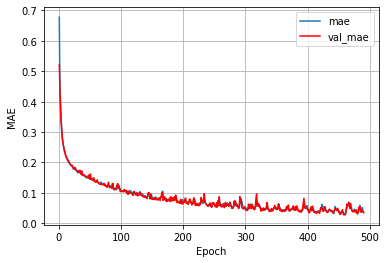

In [6]:
# MAE Graph

plt.plot(range(1, len(mae_) + 1), mae_, label="mae")
plt.plot(range(1, len(val_mae_) + 1), val_mae_, color = "red", label="val_mae")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.show()

# 平均二乗誤差グラフ


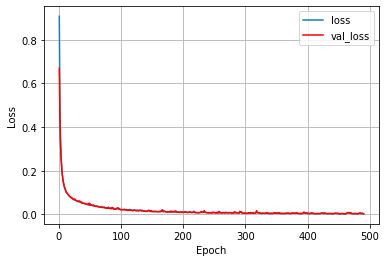

In [7]:
# Loss Graph

plt.plot(range(1, len(loss_) + 1), loss_, label="loss")
plt.plot(range(1, len(val_loss_) + 1), val_loss_, color = "red", label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Validation

predictions = model.predict(val_data)
    
for i, (l, p) in enumerate(zip(val_label, predictions)):
    msg = str(i) + ", label: " + str(round(l, 3)) + ", prediction: " + str(round(p[0], 3))
    print(msg)

# 検証
0, label: -0.043, prediction: -0.006
1, label: 0.457, prediction: 0.447
2, label: -0.108, prediction: -0.129
3, label: -0.532, prediction: -0.542
4, label: 0.946, prediction: 0.939
5, label: -0.782, prediction: -0.81
6, label: -1.51, prediction: -1.408
7, label: -0.434, prediction: -0.46
8, label: -0.934, prediction: -0.897
9, label: -0.815, prediction: -0.917
10, label: -0.076, prediction: -0.054
11, label: -0.326, prediction: -0.343
12, label: -0.847, prediction: -0.851
13, label: 0.185, prediction: 0.173
14, label: -0.641, prediction: -0.625
15, label: -0.043, prediction: -0.037
16, label: -0.978, prediction: -1.006
17, label: -0.076, prediction: -0.066
18, label: -0.956, prediction: -0.964
19, label: -0.423, prediction: -0.448
20, label: -0.88, prediction: -0.942
21, label: -1.489, prediction: -1.458
22, label: 0.066, prediction: 0.071
23, label: -0.217, prediction: -0.224
24, label: -0.793, prediction: -0.812
25, label: 0.903, prediction: 0.911
26, label: 0.598, prediction: 0